# Case Study on ANOVA


#### XYZ Company has offices in four different zones. The company wishes toinvestigate the following :
● The mean sales generated by each zone.

● Total sales generated by all the zones for each month.

● Check whether all the zones generate the same amount of sales.

Help the company to carry out their study with the help of data provided.

In [38]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing data
data= pd.read_csv('Sales_data_zone_wise.csv')

In [4]:
data

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062
5,Month - 6,1534390,1573128,1751825,2292044
6,Month - 7,1820196,1992031,1786826,1688055
7,Month - 8,1625696,1665534,2161754,2363315
8,Month - 9,1652644,1873402,1755290,1422059
9,Month - 10,1852450,1913059,1754314,1608387


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [37]:
data.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


#### ● The mean sales generated by each zone.

In [5]:
data.mean()

Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
dtype: float64

Text(0, 0.5, 'Mean Sales')

<Figure size 1080x576 with 0 Axes>

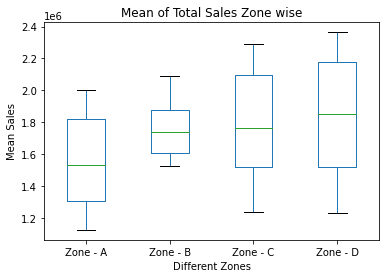

In [36]:
plt.figure(figsize=(15,8))
data.plot(kind='box')
plt.title("Mean of Total Sales Zone wise")
plt.xlabel("Different Zones")
plt.ylabel("Mean Sales")

#### ● Total sales generated by all the zones for each month.

In [39]:
data.groupby(["Month"])[["Zone - A","Zone - B","Zone - C","Zone - D"]].sum()

,Zone - A,Zone - B,Zone - C,Zone - D
Month,,,,
Month - 1,1483525,1748451,1523308,2267260
Month - 10,1852450,1913059,1754314,1608387
Month - 11,2004480,1740365,1317869,1970069
Month - 12,1537539,1875658,1237722,1460165
Month - 13,1254939,1588473,1348629,1733383
Month - 14,1821799,1844081,1617376,1872259
Month - 15,1128185,1804613,1767047,1234311
Month - 16,1491534,1542053,1882159,1590913
Month - 17,1182110,1552388,2234469,2180416


In [31]:
total_sum=data.sum(axis=1)
total_sum

0     7022544
1     7152303
2     6475939
3     8174449
4     5995328
5     7151387
6     7287108
7     7816299
8     6703395
9     7128210
10    7032783
11    6111084
12    5925424
13    7155515
14    5934156
15    6506659
16    7149383
17    7083490
18    6971953
19    7124599
20    7389597
21    7560001
22    6687919
23    7784747
24    6095918
25    6512360
26    6267918
27    7470920
28    6772277
dtype: int64

#### ● Check whether all the zones generate the same amount of sales.

Here we can perform one way anova

We can take :

   * H0 = Sales generated from all the zones are equal
    
   * H1 = Sales generated from different zones are not equal

In [ ]:
import scipy

In [ ]:
from scipy.stats import f_oneway

In [ ]:
a=data["Zone - A"]
b=data["Zone - B"]
c=data["Zone - C"]
d=data["Zone - D"]

In [ ]:
scipy.stats.f_oneway(a,b,c,d,axis=0)

We take significance level as 0.05

Here P-value is much less than our significance level

### Insight

So we our reject Null hypothesis

As Sales from different zones are not same

Zone-A have comparitively lower sales

Zone-D is highest in sales